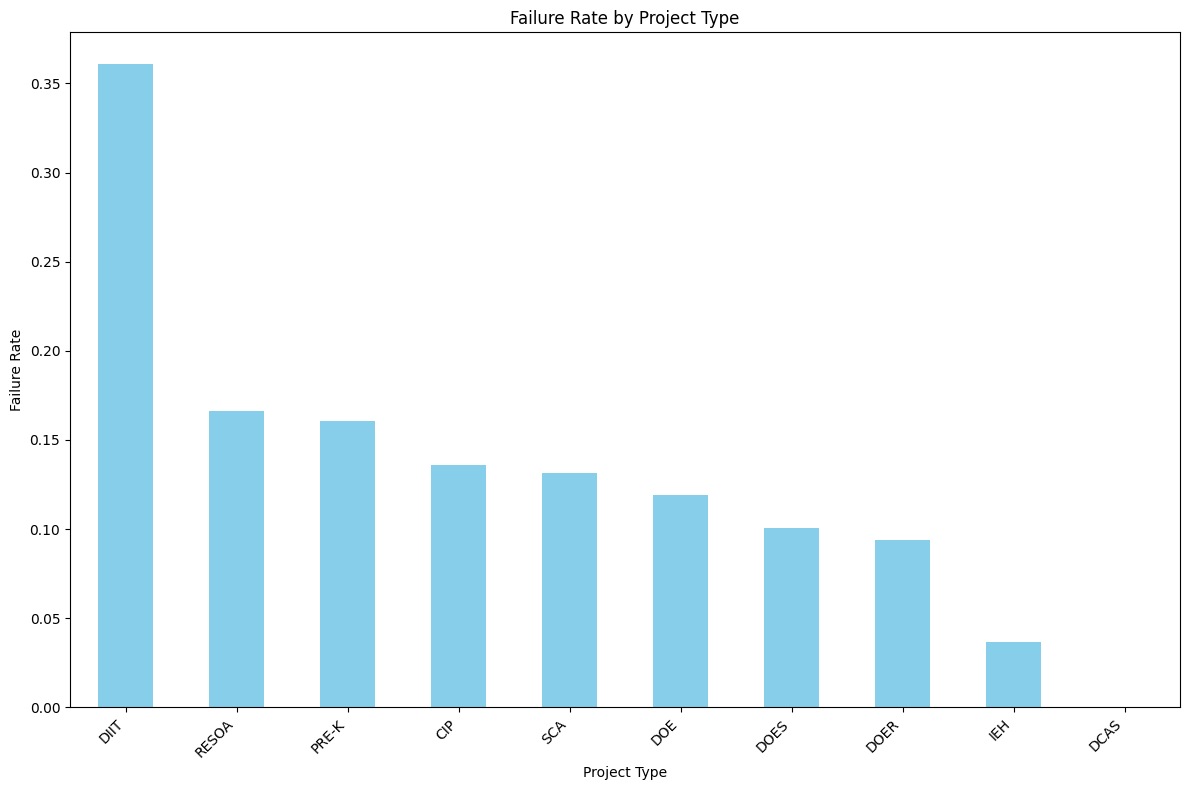

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# List of keywords to keep
keywords = [
    "SCA", "CIP", "DIIT", "DOE", "DOES", "DOER",
    "RESOA", "IEH", "PRE-K", "DCAS", "FY"
]

df = pd.read_csv('https://datasocibmproject.s3.ap-southeast-2.amazonaws.com/structured_data/capital_project_schedules_and_budgets_1.csv')

# Columns to check for keywords
columns_to_check = ['project_type', 'project_phase_actual_start_date', 'project_phase_planned_end_date', 'project_phase_actual_end_date']

# Function to find keywords in specified columns
def find_keywords(row, columns, keywords):
    found_keywords = []
    for column in columns:
        for keyword in keywords:
            if pd.notna(row[column]) and keyword in row[column]:
                found_keywords.append(keyword)
    return found_keywords

# Apply the function to each row
df['project_type_split'] = df.apply(lambda row: find_keywords(row, columns_to_check, keywords), axis=1)

# Explode the list into separate rows
df_exploded = df.explode('project_type_split')

# Filter out rows where 'project_type_split' is NaN
df_exploded = df_exploded[df_exploded['project_type_split'].notna()]

# Calculate the failure rate for each project type
failure_rate = df_exploded.groupby('project_type_split')['failure'].mean()

# Sort the failure rate
failure_rate = failure_rate.sort_values(ascending=False)

# Bar chart
plt.figure(figsize=(12, 8))
failure_rate.plot(kind='bar', color='skyblue')
plt.title('Failure Rate by Project Type')
plt.xlabel('Project Type')
plt.ylabel('Failure Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()
